In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['axes.unicode_minus'] = False

In [2]:
import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\HYHWPEQ.TTF'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

In [3]:
import matplotlib.pyplot as plt

# matplotlib 폰트설정
plt.rc('font', family='NanumGothic') # For Windows

In [4]:
sub = pd.read_excel('policw.xlsx') 

In [5]:
sub=sub.set_index('범죄중분류')

In [6]:
sub.head()

,범죄대분류,"아파트,연립다세대",단독주택,고속도로,노상,백화점,슈퍼마켓,편의점,대형할인매장,상점,...,종교기관,산야,해상,부대,구금장소,공지,주차장,공중화장실,피씨방,기타
범죄중분류,,,,,,,,,,,,,,,,,,,,,
살인기수,강력범죄,95,71,1,24,1,0,0,0,0,...,2,6,3,0,0,0,2,0,0,50
살인미수등,강력범죄,85,90,1,112,0,1,0,0,2,...,1,1,2,0,0,0,7,1,0,142
강도,강력범죄,82,86,1,261,0,14,83,1,21,...,5,7,1,0,0,0,18,4,5,172
강간,강력범죄,1030,896,1,184,0,3,4,0,16,...,14,9,0,0,0,3,48,47,2,1093
유사강간,강력범죄,138,99,0,36,0,0,1,0,2,...,0,1,0,0,0,0,12,11,0,127


In [7]:
sub.columns

Index(['범죄대분류', '아파트,연립다세대', '단독주택', '고속도로', '노상', '백화점', '슈퍼마켓', '편의점',
       '대형할인매장', '상점', '시장,노점', '숙박업소,목욕탕', '유흥접객업소', '사무실', '공장', '공사장,광산',
       '창고', '역,대합실', '지하철', '기타표통수단내', '흥행장', '유원지', '학교', '금융기관', '의료기관',
       '종교기관', '산야', '해상', '부대', '구금장소', '공지', '주차장', '공중화장실', '피씨방', '기타'],
      dtype='object')

In [8]:
sub.index

Index(['살인기수', '살인미수등', '강도', '강간', '유사강간', '강제추행', '기타강간강제추행등', '방화', '상해',
       '폭행', '체포감금', '협박', '약취유인', '폭력행위등', '공갈', '손괴', '직무유기', '직권남용', '증수뢰',
       '통화', '문서인장', '유가증권인지', '사기', '횡령', '배임', '성풍속범죄', '도박범죄', '특별경제범죄',
       '마약범죄', '보건범죄', '환경범죄', '교통범죄', '노동범죄', '안보범죄', '선거범죄', '병역범죄', '기타범죄'],
      dtype='object', name='범죄중분류')

In [9]:
gang=sub.loc[['강제추행'], :]
gang.T

범죄중분류,강제추행
범죄대분류,강력범죄
"아파트,연립다세대",1060
단독주택,840
고속도로,15
노상,3390
백화점,19
슈퍼마켓,54
편의점,218
대형할인매장,13
상점,237


In [10]:
real_gang=gang.T
real_gang=real_gang.drop(['범죄대분류'])
real_gang

범죄중분류,강제추행
"아파트,연립다세대",1060
단독주택,840
고속도로,15
노상,3390
백화점,19
슈퍼마켓,54
편의점,218
대형할인매장,13
상점,237
"시장,노점",97


## 1. 강제 추행이 일어나는 장소의 순위(지하철은 몇위?)


In [11]:
# 강제 추행이 일어나는 장소 순위
realme=real_gang.sort_values(by="강제추행", ascending=False)
realme

범죄중분류,강제추행
기타,5149
노상,3390
유흥접객업소,2170
"아파트,연립다세대",1060
지하철,1046
기타표통수단내,972
단독주택,840
"숙박업소,목욕탕",670
사무실,406
"역,대합실",359


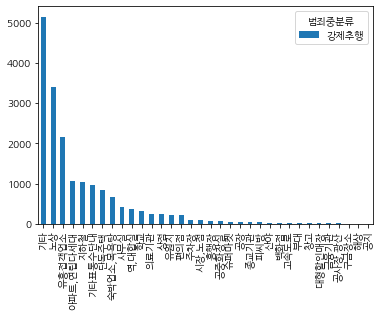

In [12]:
real_gang.sort_values(by="강제추행", ascending=False).plot(kind='bar')

## 지하철에서 많이 일어나는 범죄들

In [14]:
subway=sub.loc[:, ['지하철']]
subway

,지하철
범죄중분류,
살인기수,0
살인미수등,0
강도,0
강간,0
유사강간,0
강제추행,1046
기타강간강제추행등,0
방화,1
상해,28


In [15]:
# 이거 쓰삼
subway.sort_values(by='지하철', ascending=False)

,지하철
범죄중분류,
강제추행,1046
성풍속범죄,650
횡령,439
폭행,267
기타범죄,107
사기,54
상해,28
손괴,16
특별경제범죄,13


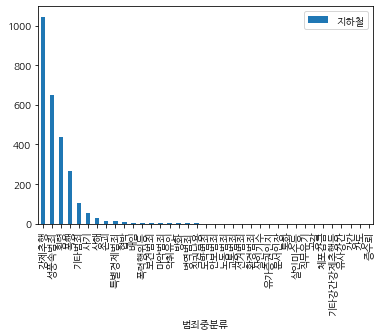

In [16]:
# 이거 쓰삼
subway.sort_values(by='지하철', ascending=False).plot(kind='bar')